## Laboratorio 3: Modelo lineal Bayesiano

### Manuel Felipe Pineda

- Consulte para que sirven los comandos randn, normpdf, mvnrnd, y mvnpdf de MatLab.

    R: 
    
    *randn* retorna un escalar tomado de una distribucion normal
    
    *normpdf* calcula la funcion de densidad de probabilidad para un X dado
    
    *mvnrnd* es la version multivariada de randn
    
    *mvnpdf* es la version multivariada de normpdf

- Con base en la funcion de MatLab provista para la solucion del Laboratorio 2 (modelo lineal para minimos cuadrados), genere su funcion de modelo lineal utilizando maxima verosimilitud como funcion de costo con pdf Gaussiana.

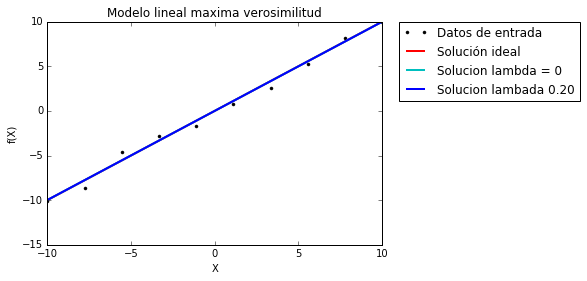

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


# W usando maxima verosimilitud. 
# Se llega a la misma forma de minimos cuadrados
def W_ML(X, y, l = 0.0): 
    C = X.transpose().dot(X)
    s = X.shape[1]
    T = np.linalg.pinv(C + l * np.eye(s, s))
    w =  T.dot(X.transpose()).dot(y)
    ye = X.dot(w)
    return [ye, w, C]


import scipy.spatial as ss

def agauss(X, mu, sig = None):
    if (sig == None):
        sig = np.median(ss.distance.squareform(ss.distance.cdist(X, mu)))
    D = ss.distance.cdist(X, mu)
    phi = np.exp(-(D ** 2) / (2 * (sig ** 2)))
    return phi

def plot_with_phi(x, y, X, Y, phi, yn):
    def lcurva(phi, Y):
        # TODO: implement l-curve
        return [0.2, 1]

    [ye0, w, C0] = lineal_min_cua(phi, yn)
    [la, M] = lcurva(phi, Y)
    ye = lineal_min_cua(phi, yn, la)[0]

    plt.plot(x, yn, 'k.', label = 'Datos de entrada')
    plt.plot(x, y, 'r', linewidth = 2, label = 'Solución ideal')
    plt.plot(x, ye0[:,0], 'c', linewidth = 2, label = 'Solucion lambda = 0')
    plt.plot(x, ye, 'b', linewidth = 2, label = 'Solucion lambada %.2f' % la)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Modelo lineal maxima verosimilitud')
    plt.xlabel('X')
    plt.ylabel('f(X)')
    plt.show()


def gen_lineal_data(a, b, c):
    x = np.linspace(a, b, c)
    X = np.array([x]).T
    y = x
    Y = np.array([y]).T
    varn = 0.7;
    noise = np.random.normal(0, varn, size=len(y))
    noise = np.array([noise]).T
    yn = Y + noise
    return [x, y, yn, X, Y]

def gen_data(a, b, c, varn):
    x = np.linspace(a, b, c)
    X = np.array([x]).T
    y = np.sinc(x)
    Y = np.array([y]).T
    noise = np.random.normal(0, varn, size=len(y))
    noise = np.array([noise]).T
    yn = Y + noise
    return [x, y, yn, X, Y]
    
    
def plot_lineal_approx(a, b, c, LF): # Plots sinc approximation using LF latent functions
    [x, y, yn, X, Y] = gen_lineal_data(a, b, c)    
    plot_with_phi(x, y, X, Y, X, yn)

plot_lineal_approx(-10, 10, 10, 30)

- Obtenga la solucion de maxima verosimilitud para la funcion sinc(x) del Laboratorio 2 asumiendo dos condiciones diferentes de ruido (diferentes varianzas para el ruido blanco Gaussiano) y grafique la verosimilitud del modelo lineal asumiendo una distribucion Gaussiana (Asuma la funcion de representacion no lineal de su preferencia: polinomial, Guassiana, sigmoide).

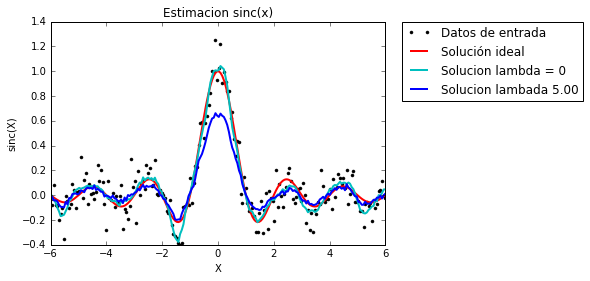

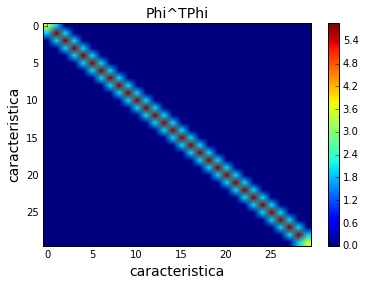

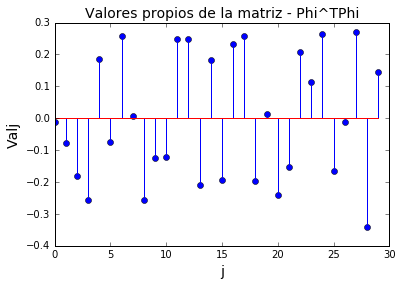

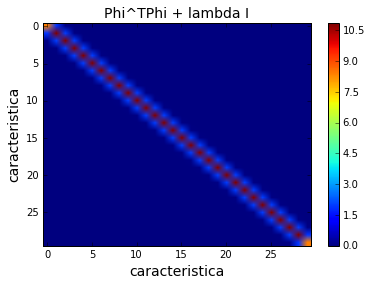

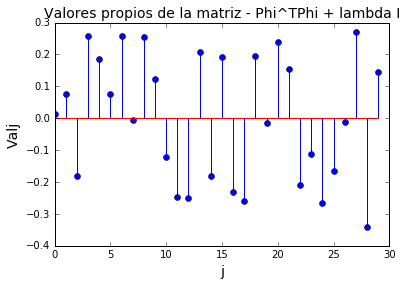

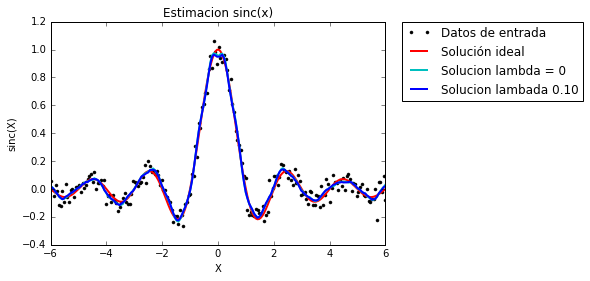

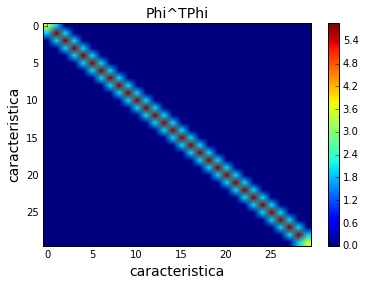

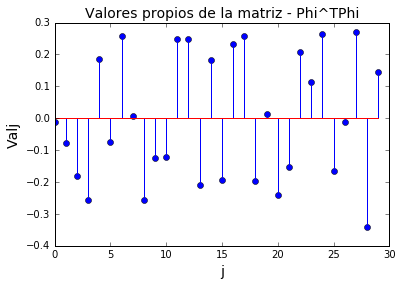

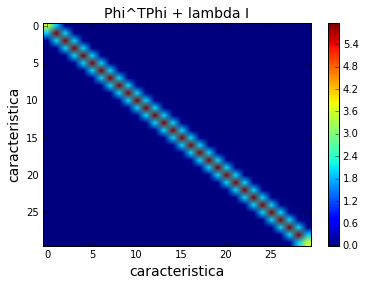

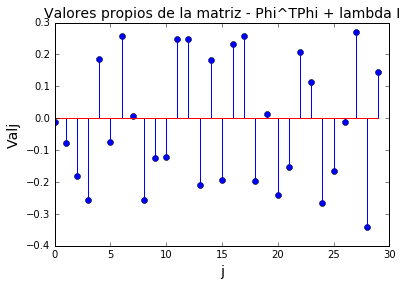

In [13]:

def plot_extra(x, y, X, Y, phi, yn, ye0, ye, la):
    C0 = phi.transpose().dot(phi)
    plt.plot(x, yn, 'k.', label = 'Datos de entrada')
    plt.plot(x, y, 'r', linewidth = 2, label = 'Solución ideal')
    plt.plot(x, ye0[:,0], 'c', linewidth = 2, label = 'Solucion lambda = 0')
    plt.plot(x, ye, 'b', linewidth = 2, label = 'Solucion lambada %.2f' % la)

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Estimacion sinc(x)')
    plt.xlabel('X')
    plt.ylabel('sinc(X)')
    plt.show()
    
    plt.imshow(C0, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi', fontsize = 14)
    plt.show()

    w, Val0 = np.linalg.eig(C0)
    plt.stem(np.diag(Val0))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi', fontsize = 14)
    plt.show()

    CReg = C0 + la * np.eye(len(C0))
    w, Val1 = np.linalg.eig(CReg)

    plt.imshow(CReg, aspect='auto')
    plt.colorbar()
    plt.xlabel('caracteristica', fontsize = 14)
    plt.ylabel('caracteristica', fontsize = 14)
    plt.title('Phi^TPhi + lambda I', fontsize = 14)
    plt.show()

    plt.stem(np.diag(Val1))
    plt.xlabel('j', fontsize = 14)
    plt.ylabel('Valj', fontsize = 14)
    plt.title('Valores propios de la matriz - Phi^TPhi + lambda I', fontsize = 14)
    plt.show()
    

def w_ML(X, Y, la = None): #computes w using maximum likelihood estimator
    if (la == None):
        la = 0.5
    C = X.transpose().dot(X)
    s = X.shape[1]
    D = np.linalg.inv(C + la * np.eye(s, s))
    return D.dot(X.transpose()).dot(Y)

def betha_inv_ML(X, Y, w = None): #computes $\betha$ using maximum likelihood estimator
    if (not (w is None)):
        w = w_ML(X, Y)
    N = X.shape[0]
    a = (Y - X.dot(w))
    return (1.0 / N) * (a.T).dot(a);

def compute_estimate_ML(X, w, sigma):
    y = np.random.normal(X.dot(w), sigma)
    return y

def gen_phi(X, a, b, LF, sig = 0.2):
    mu = np.linspace(a, b, LF)
    mu = np.array([mu]).T
    phi = agauss(X, mu, sig)
    return phi


def ML_estimator(noise_var, alpha):
    [x, y, yn, X, Y] = gen_data(-6, 6, 200, noise_var)
    phi = gen_phi(X, -6, 6, 30)
    w1 = w_ML(phi, yn, 0.0)
    w2 = w_ML(phi, yn, alpha)
    sigma1 = betha_inv_ML(phi, yn, w1)
    sigma2 = betha_inv_ML(phi, yn, w2)
    ye1 = compute_estimate_ML(phi, w1, sigma1)
    ye2 = compute_estimate_ML(phi, w2, sigma2)

    plot_extra(x, y, X, Y, phi, yn, ye1, ye2, alpha)
    
ML_estimator(0.1, 5)
ML_estimator(0.05, 0.1)

- Obtenga la solucion de MAP para la funcion sinc(x) del Laboratorio 2 para dos condiciones diferentes de ruido y grafique la distribucion predictiva del modelo lineal asumiendo una distribucion Gaussiana (Asuma la funcion de representacion no lineal de su preferencia: polinomial, Guassiana, sigmoide). Recuerde que para MAP debe asumir o estimar los valores de $\alpha$ y $\beta$

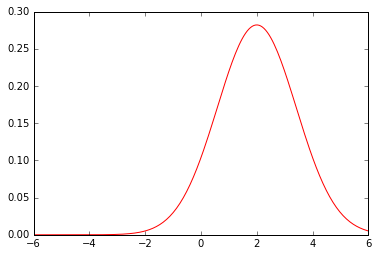

In [24]:
## MAP

import scipy.stats as sst

def plot_norm(mu, sig2, c):
    x = np.linspace(-6, 6, 200)
    y = sst.norm.pdf(x, mu, np.sqrt(sig2))
    plt.plot(x, y, c)

    
# computes the posterior of W based on prior mu0 and s20
# uses the first n terms of X
def posterior(mu, s2, s20, mu0, X, n):
    pass
    
    
[x, y, yn, X, Y] = gen_data(-6, 6, 200, 0.1)
phi = gen_phi(X, -6, 6, 30)
plot_norm(2, 2, 'r')

- Realice la aproximacion de alguna variable de interes de una base de datos del repositorio Kaggle. Utilice un modelo lineal regularizado por minimos cuadrados, maxima verosimilitud y MAP.

## Discusion
